ISHIMWE KAREKEZI GUY GAEL
andrewid: iguygael
MS EAI


                                                                     DIAML ASSIGNMENT 3

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy
import matplotlib
import sklearn
import shap
from matplotlib import pyplot as plt
from pandas import DataFrame
import statistics as ststc
from scipy import stats
from IPython.display import display
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


In [ ]:
# I initialize bold settings which I will use in my print statements for better readability
# initializing bold and end to make our print messages bold 
BOLD = '\033[1m'
END = '\033[0m'

# Q1) 

After loading and exploring the dataset, analyze the structure and distribution of the data. What types of variables are present in the dataset (categorical, numerical, etc.)?
Which numerical features show evidence of skewness or non-normal distribution?
Based on your analysis, explain why transforming skewed variables might be necessary before modeling.
Describe the potential challenges of combining categorical and numerical features in one predictive model.

 Summary statistics


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Our Original dataset


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


Our Dataset Information :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB

Our Dataset Shape:
(614, 13)

Data Types:
Loan_ID               object
Gender        

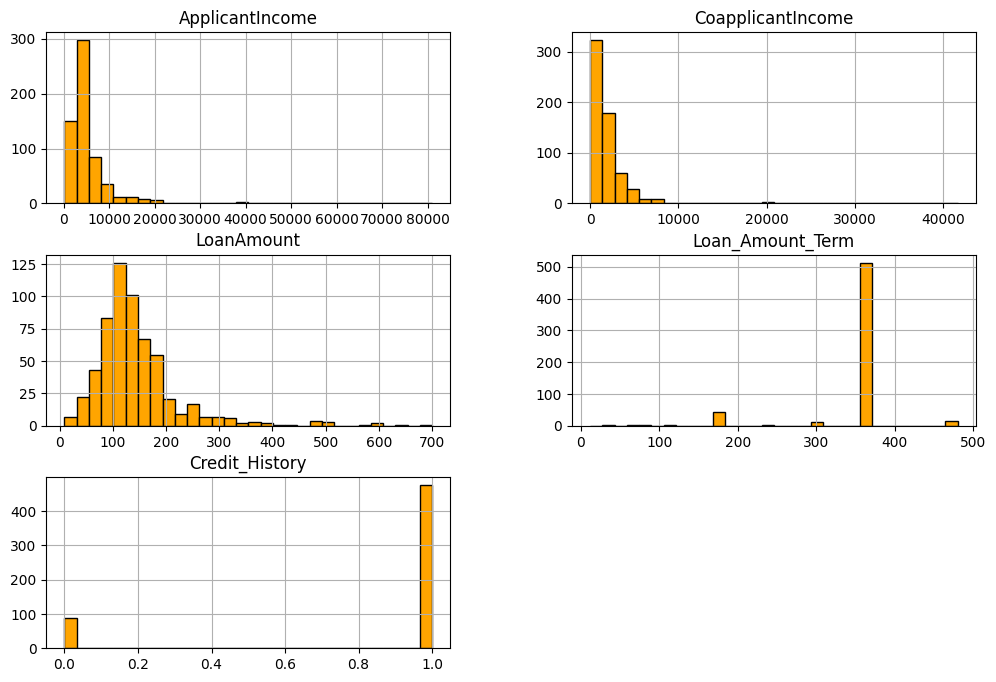

In [3]:
data_set = pd.read_csv("Loan Status Prediction.csv")
data_set= DataFrame(data_set)

#summary statistics
print(f"{BOLD} Summary statistics{END}")
display(data_set.describe())
print(f"{BOLD}Our Original dataset{END}")
display(data_set)
print(f"{BOLD}Our Dataset Information :{END}")
data_set.info() 
# now lets see the dataset dimensions
print(f"\n{BOLD}Our Dataset Shape:{END}")
print(data_set.shape)
# now checking the data types
print(f"\n{BOLD}Data Types:{END}")
print(data_set.dtypes)
# now checking our column names
print(f"\n{BOLD}Column Names:{END}")
print(list(data_set.columns))

# Data Types 
print(f"\n{BOLD}Categorical attributes in our Dataset:{END}")
print(list(data_set.select_dtypes(include=['object']).columns))

print(f"\n{BOLD}Numerical attributes in our Dataset:{END}")
print(list(data_set.select_dtypes(include=['number']).columns))

# now lets check the numeric distributions:
numerical_columns = data_set.select_dtypes(include=['int64','float64'])
numerical_columns_list = numerical_columns.columns
numerical_columns.hist(figsize=(12, 8), bins=30,color='orange',edgecolor='k')


# Now let us check for skewness
print(f"\n{BOLD}Skewness of Numerical attributes:{END}")
print(numerical_columns.skew())
print(f"\n{BOLD}kurtosis of Numerical attributes:{END}")
print(numerical_columns.kurtosis())



# Q2)

Examine the dataset to determine the percentage of missing values in each variable and identify unusual data points in the numerical variables using the IQR or Z-score method, and then decide how to handle them.
Plot the boxplots before and after handling the unusual data.
Refl ect on how your choices aff ect the data distribution and what biases could be introduced when fi lling in missing categorical values.

percentage of missing values for each variable
Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64


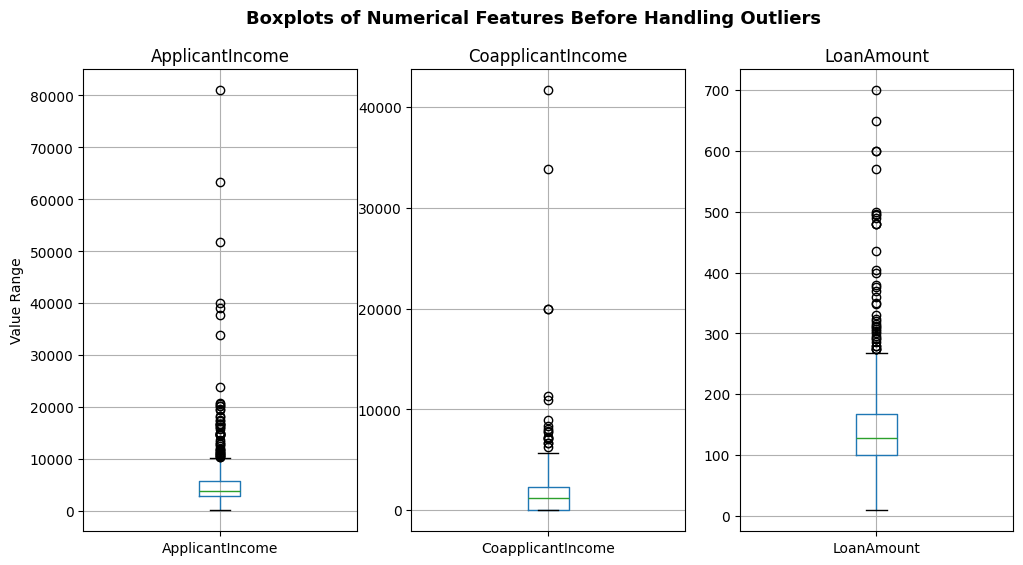

Detecting outliers using the IQR method (only continuous variables):
ApplicantIncome      8.14
CoapplicantIncome    2.93
LoanAmount           6.68
dtype: float64
Outliers handled


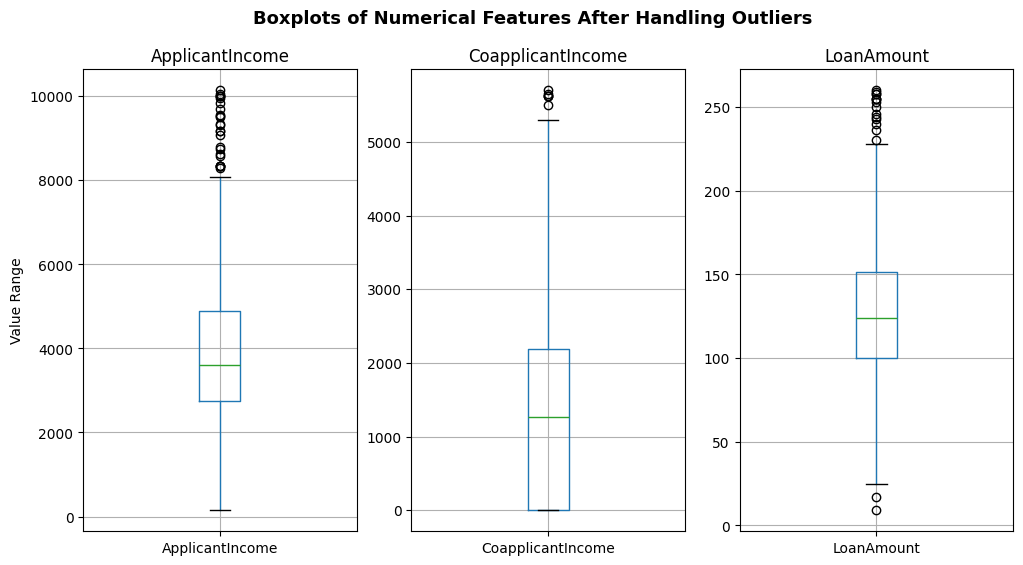

In [4]:
# now lets find the percentage of missing values in each variable or attribute
missing_val= (data_set.isnull().sum()*100)/len(data_set)
print(f"{BOLD}percentage of missing values for each variable{END}")
print(missing_val)

# now let us create the subplots
# This one line creates both the Figure and the 3 Axes
fig, axs = plt.subplots(1, 3, figsize=(12, 6)) 

# Now we plot each boxplot on its own axis
data_set.boxplot(column='ApplicantIncome', ax=axs[0])
data_set.boxplot(column='CoapplicantIncome', ax=axs[1])
data_set.boxplot(column='LoanAmount', ax=axs[2])
axs[0].set_title('ApplicantIncome')
axs[1].set_title('CoapplicantIncome')
axs[2].set_title('LoanAmount')
axs[0].set_ylabel('Value Range')
fig.suptitle("Boxplots of Numerical Features Before Handling Outliers", fontsize=13,fontweight='bold')
plt.show()

# now let us first handle missing values NaN 
# we use median() as our data are skewed and the median is not sensitive to outliers
# let us first create a copy of the dataset for cleaning
cleaned_dataset = data_set.copy()
 # we access the names of the numerical columns
median_values = cleaned_dataset[numerical_columns_list].median()
cleaned_dataset[numerical_columns_list] = cleaned_dataset[numerical_columns_list].fillna(median_values)

# now let us find unusual data points in the numerical variables using the IQR method

# we exclude categorical-like numeric features such as Loan_Amount_Term and Credit_History
num_cols_for_outlier = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

# starting with quartiles calculations
Q1 = cleaned_dataset[num_cols_for_outlier].quantile(0.25)
Q3 = cleaned_dataset[num_cols_for_outlier].quantile(0.75)
IQR = Q3 - Q1

# now let's calculate bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Now let us detect outliers in our selected numerical variables
outliers = (cleaned_dataset[num_cols_for_outlier] < lower_bound) | (cleaned_dataset[num_cols_for_outlier] > upper_bound)
print(f"{BOLD}Detecting outliers using the IQR method (only continuous variables):{END}")
print((outliers.sum() * 100 / len(cleaned_dataset)).round(2))  # rounded to 2 decimals for clarity

# now lets remove outliers from our dataset
cleaned_dataset = cleaned_dataset[~outliers.any(axis=1)]
print(f"{BOLD}Outliers handled{END}")

# Boxplot after handling unusual data
fig, axs = plt.subplots(1, 3, figsize=(12, 6)) 
cleaned_dataset.boxplot(column='ApplicantIncome', ax=axs[0])
cleaned_dataset.boxplot(column='CoapplicantIncome', ax=axs[1])
cleaned_dataset.boxplot(column='LoanAmount', ax=axs[2])
axs[0].set_title('ApplicantIncome')
axs[1].set_title('CoapplicantIncome')
axs[2].set_title('LoanAmount')
axs[0].set_ylabel('Value Range')
fig.suptitle("Boxplots of Numerical Features After Handling Outliers", fontsize=13,fontweight='bold')
plt.show()




# Q3)

Differentiate between Label Encoding and One-Hot Encoding, considering their trade-off s for diff erent types of categorical variables. 

Differentiate the following scaling methods: Min-Max Scaling (Normalization), Standardization (Z-score Scaling), Robust Scaling, Unit Vector Scaling (L2 Norm Scaling)

Explore the dataset and create new features that could enhance loan prediction, such as a feature representing total income and another indicating the loan amount per income.

Transform the skewed variables and discrete numerical variables using appropriate methods, as well as categorical variables according to their type, for better modeling results.

Plot the annotated heatmap of the Pearson correlation coeffi cient between independent variables and comments on the results.

Drop the irrelevant variables and use the appropriate scaling method on the independent variables.

In [5]:
# now the new column total income will be the sum of column ApplicantIncome and CoapplicantIncome
cleaned_dataset['Total_income'] = cleaned_dataset['ApplicantIncome'] + cleaned_dataset['CoapplicantIncome']
# loan_amount_per_income will be LoanAmount divided by Total_income and we add 1 to Total_income to prevent division by zero error
cleaned_dataset['Loan_amount_per_income'] = (cleaned_dataset['LoanAmount']) / (cleaned_dataset['Total_income'] + 1)
display(cleaned_dataset.head())



,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_income,Loan_amount_per_income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0,0.021880
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,0.021011
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,0.021993
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,0.024282
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,0.023496


In [6]:
# now let us transform skewed variables
# we use logarithmic function
# in Q1 we identified four skewed columns; ApplicantIncome, CoapplicantIncome,LoanAmount, and TotalIncome
skewed_variables= cleaned_dataset[['ApplicantIncome','CoapplicantIncome','LoanAmount','Total_income']]
print(f"{BOLD}our skewed variables:{END}")
display(skewed_variables.head())
# we will only transform those four columns 
# we will use log transformation to reduce skewness
for column in ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Total_income']:
    cleaned_dataset[f'Log_{column}'] = np.log1p(cleaned_dataset[column])  # we use log1p to deal with zero values safely
print(f"{BOLD}Skewed numerical variables transformed using log transformation.{END}")

#first we need to convert discrete numerical variables into categorical
cleaned_dataset['Loan_Amount_Term'] = cleaned_dataset['Loan_Amount_Term'].astype('category')
cleaned_dataset['Credit_History'] = cleaned_dataset['Credit_History'].astype('category')
display(cleaned_dataset.head())

#displaying categorical columns:
categorical_data = cleaned_dataset.select_dtypes(include=['category', 'object'])
print(f"{BOLD}Categorical columns in our dataset{END}")
display(categorical_data.drop('Loan_ID',axis=1).head())

our skewed variables:


,ApplicantIncome,CoapplicantIncome,LoanAmount,Total_income
0,5849,0.0,128.0,5849.0
1,4583,1508.0,128.0,6091.0
2,3000,0.0,66.0,3000.0
3,2583,2358.0,120.0,4941.0
4,6000,0.0,141.0,6000.0


Skewed numerical variables transformed using log transformation.


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_income,Loan_amount_per_income,Log_ApplicantIncome,Log_CoapplicantIncome,Log_LoanAmount,Log_Total_income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0,0.021880,8.674197,0.000000,4.859812,8.674197
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,0.021011,8.430327,7.319202,4.859812,8.714732
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,0.021993,8.006701,0.000000,4.204693,8.006701
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,0.024282,7.857094,7.765993,4.795791,8.505525
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,0.023496,8.699681,0.000000,4.955827,8.699681


Categorical columns in our dataset


,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,360.0,1.0,Urban,Y


In [7]:

# we will use label encoding to transform categorical variables that are binary or ordinal and transform them into 0 or 1
# here are the columns to encode
columns_to_encode = ['Gender','Married','Education','Self_Employed','Credit_History','Loan_Status']
label_encoder = LabelEncoder()
# now we apply LabelEncoder to each column
for col in columns_to_encode:
    cleaned_dataset[col] = label_encoder.fit_transform(cleaned_dataset[col])
    

# now we apply one-hot encoding to Property_Area, Loan_Amount_Term, and Dependents using pandas.get_dummies
'''
pd.get_dummies automatically handles categorical variables by creating new binary columns for each unique category.
The parameter drop_first=True helps prevent multicollinearity by removing one dummy column per category set.
'''
cleaned_dataset = pd.get_dummies(cleaned_dataset, columns=['Property_Area', 'Dependents', 'Loan_Amount_Term'], drop_first=True)

In [8]:
display(cleaned_dataset.iloc[:, :20].head())

,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Loan_Status,Total_income,Loan_amount_per_income,Log_ApplicantIncome,Log_CoapplicantIncome,Log_LoanAmount,Log_Total_income,Property_Area_Semiurban,Property_Area_Urban,Dependents_1,Dependents_2
0,LP001002,1,0,0,0,5849,0.0,128.0,1,1,5849.0,0.021880,8.674197,0.000000,4.859812,8.674197,False,True,False,False
1,LP001003,1,1,0,0,4583,1508.0,128.0,1,0,6091.0,0.021011,8.430327,7.319202,4.859812,8.714732,False,False,True,False
2,LP001005,1,1,0,1,3000,0.0,66.0,1,1,3000.0,0.021993,8.006701,0.000000,4.204693,8.006701,False,True,False,False
3,LP001006,1,1,1,0,2583,2358.0,120.0,1,1,4941.0,0.024282,7.857094,7.765993,4.795791,8.505525,False,True,False,False
4,LP001008,1,0,0,0,6000,0.0,141.0,1,1,6000.0,0.023496,8.699681,0.000000,4.955827,8.699681,False,True,False,False


 Pearson Correlation Heatmap of Independent Variables 


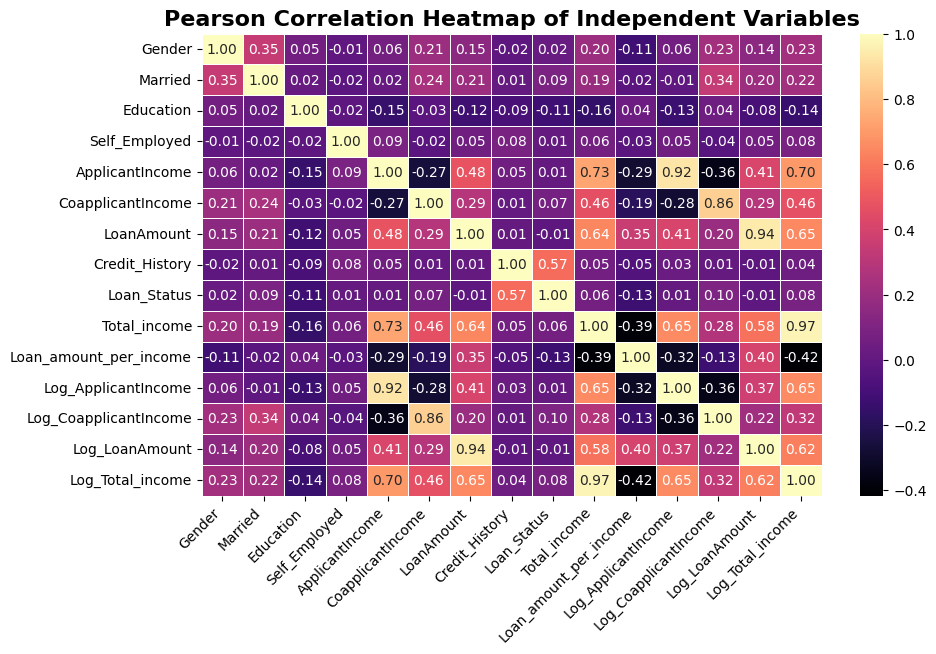

In [9]:
# now let us plot the annotated heatmap of the Pearson correlation coefficient between independent variables 
numeric_data = cleaned_dataset.select_dtypes(include=['int64', 'float64'])
# Now we calculate the Pearson correlation matrix
correlation_matrix = numeric_data.corr(method='pearson')

# Now we plot the heatmap
plt.figure(figsize=(10, 6)) 
print(f"{BOLD} Pearson Correlation Heatmap of Independent Variables {END}")
sns.heatmap(correlation_matrix, annot=True,fmt='.2f',cmap='magma',linewidths=0.5)
plt.title("Pearson Correlation Heatmap of Independent Variables", fontsize=16,fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()



In [10]:
print(f"{BOLD}Dropped irrelevant or redundant variables.{END}")
irrelevant_variables = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Total_income']
cleaned_dataset.drop(columns=irrelevant_variables, inplace=True, errors='ignore')
display(cleaned_dataset.info())

Dropped irrelevant or redundant variables.
<class 'pandas.core.frame.DataFrame'>
Index: 535 entries, 0 to 613
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Loan_ID                  535 non-null    object 
 1   Gender                   535 non-null    int64  
 2   Married                  535 non-null    int64  
 3   Education                535 non-null    int64  
 4   Self_Employed            535 non-null    int64  
 5   Credit_History           535 non-null    int64  
 6   Loan_Status              535 non-null    int64  
 7   Loan_amount_per_income   535 non-null    float64
 8   Log_ApplicantIncome      535 non-null    float64
 9   Log_CoapplicantIncome    535 non-null    float64
 10  Log_LoanAmount           535 non-null    float64
 11  Log_Total_income         535 non-null    float64
 12  Property_Area_Semiurban  535 non-null    bool   
 13  Property_Area_Urban      535 non-null    b

None

In [ ]:

# here is the list of variables that needs scaling because these are the log-transformed continuous variables and the scaling will produce an average mean of 0 and a standard deviation of 1
variables_to_scale = ['Log_ApplicantIncome', 'Log_CoapplicantIncome', 'Log_LoanAmount','Log_Total_income','Loan_amount_per_income']

# we need to initialize the scaler
scaler = StandardScaler()

# Fit and transform the data, then overwrite the original columns
cleaned_dataset[variables_to_scale] = scaler.fit_transform(cleaned_dataset[variables_to_scale])
print(f"{BOLD} the scaled final dataset is: {END}")
display(cleaned_dataset)
print()

 the scaled final dataset is: 


,Loan_ID,Gender,Married,Education,Self_Employed,Credit_History,Loan_Status,Loan_amount_per_income,Log_ApplicantIncome,Log_CoapplicantIncome,...,Dependents_3+,Loan_Amount_Term_36.0,Loan_Amount_Term_60.0,Loan_Amount_Term_84.0,Loan_Amount_Term_120.0,Loan_Amount_Term_180.0,Loan_Amount_Term_240.0,Loan_Amount_Term_300.0,Loan_Amount_Term_360.0,Loan_Amount_Term_480.0
0,LP001002,1,0,0,0,1,1,-0.344771,0.990468,-1.148115,...,False,False,False,False,False,False,False,False,True,False
1,LP001003,1,1,0,0,1,0,-0.450847,0.475332,0.781100,...,False,False,False,False,False,False,False,False,True,False
2,LP001005,1,1,0,1,1,1,-0.331062,-0.419512,-1.148115,...,False,False,False,False,False,False,False,False,True,False
3,LP001006,1,1,1,0,1,1,-0.051707,-0.735533,0.898866,...,False,False,False,False,False,False,False,False,True,False
4,LP001008,1,0,0,0,1,1,-0.147581,1.044300,-1.148115,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,1,1,-0.028195,-0.491099,-1.148115,...,False,False,False,False,False,False,False,False,True,False
610,LP002979,1,1,0,0,1,1,-1.826474,0.243230,-1.148115,...,True,False,False,False,False,True,False,False,False,False
611,LP002983,1,1,0,0,1,1,0.699171,1.670818,0.297582,...,False,False,False,False,False,False,False,False,True,False
612,LP002984,1,1,0,0,1,1,-0.005879,1.538830,-1.148115,...,False,False,False,False,False,False,False,False,True,False


# Q4)

Explore the dataset by splitting it into training and testing sets, then train Linear models such as Logistic Regression, Support Vector Machine, and stochastic gradient descent (SGD).
Evaluate their performance using appropriate metrics, and visualize the results with a confusion matrix. Refl ect on which models perform best and why.

In [12]:
# let split our cleaned dataset into train-test 
X= cleaned_dataset.drop(['Loan_Status','Loan_ID'],axis=1) # our independent variable
y = cleaned_dataset['Loan_Status']  # our target or response variable
# splitting 70 for training and 30 for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")


Training set size: (374, 24)
Test set size: (161, 24)


Logistic Regression Model Accuracy on Test Set in %: 84.472
Support Vector Classifier Model Accuracy on Test Set in %: 85.714
SGD Classifier Model Accuracy on Test Set in %: 83.851


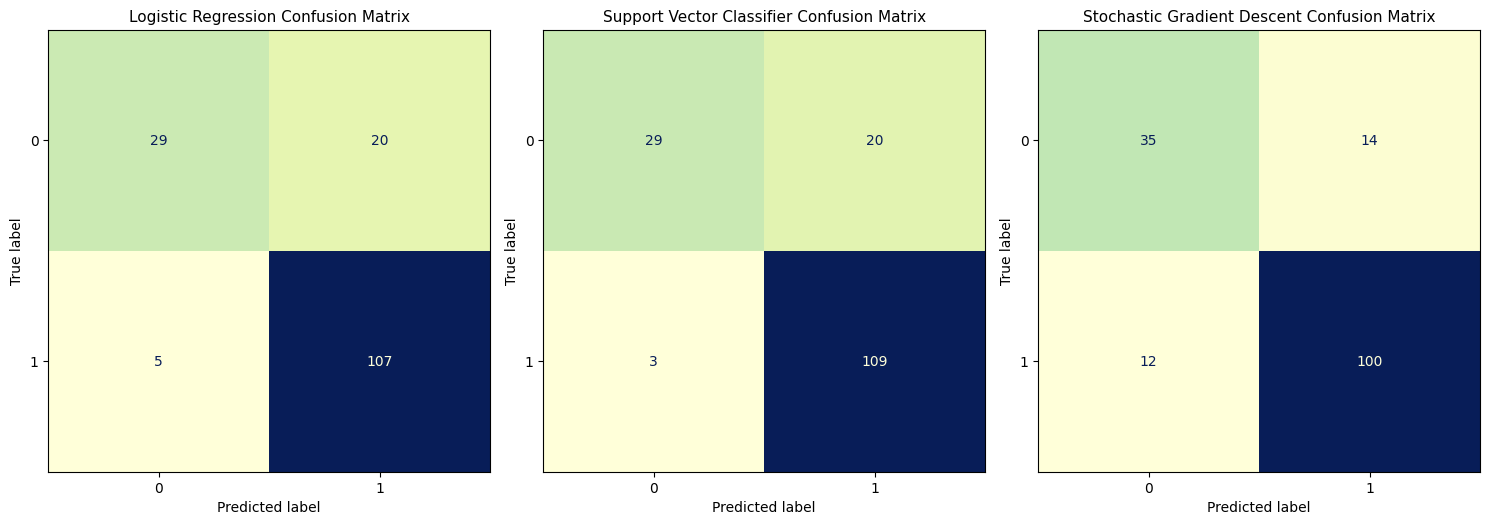

Classification Report for Logistic Regression Model:


,precision,recall,f1-score,support
0,0.852941,0.591837,0.698795,49.00000
1,0.842520,0.955357,0.895397,112.00000
accuracy,0.844720,0.844720,0.844720,0.84472
macro avg,0.847730,0.773597,0.797096,161.00000
weighted avg,0.845691,0.844720,0.835562,161.00000


Classification Report for Support Vector Classifier Model:


,precision,recall,f1-score,support
0,0.906250,0.591837,0.716049,49.000000
1,0.844961,0.973214,0.904564,112.000000
accuracy,0.857143,0.857143,0.857143,0.857143
macro avg,0.875606,0.782526,0.810307,161.000000
weighted avg,0.863614,0.857143,0.847190,161.000000


Classification Report for Stochastic Gradient Descent Model:


,precision,recall,f1-score,support
0,0.744681,0.714286,0.729167,49.000000
1,0.877193,0.892857,0.884956,112.000000
accuracy,0.838509,0.838509,0.838509,0.838509
macro avg,0.810937,0.803571,0.807061,161.000000
weighted avg,0.836863,0.838509,0.837542,161.000000


In [13]:

# Logistic Regression Model
LogisticRegression_model = LogisticRegression(random_state=42, max_iter=2000, C=1.0)
# training the model using the training set
LogisticRegression_model.fit(X_train, y_train)
# Now making predictions on the test set
y_pred = LogisticRegression_model.predict(X_test)
# finally we evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred) * 100
print(f"{BOLD}Logistic Regression Model Accuracy on Test Set in %:{END} {accuracy:.3f}")

# Support Vector Machine Model
# since our target variable is categorical we will use SVC 
SupportVectorClassModel = SVC(kernel='linear', random_state=42, C=1.0, probability=True)
# training the model using the training set
SupportVectorClassModel.fit(X_train, y_train)
# Now making predictions on the test set
y_pred_SVC = SupportVectorClassModel.predict(X_test)
# finally we evaluate the SVC model's performance
accuracy = accuracy_score(y_test, y_pred_SVC) * 100
print(f"{BOLD}Support Vector Classifier Model Accuracy on Test Set in %:{END} {accuracy:.3f}")

# Stochastic Gradient Descent Classifier Model
SDG_classifier = SGDClassifier(loss='log_loss', class_weight='balanced', random_state=42, max_iter=2000, alpha=0.01)
# training the classifier
SDG_classifier.fit(X_train, y_train)
# Now making predictions on the test set
y_pred_SDG = SDG_classifier.predict(X_test)
# finally we evaluate the SGD model's performance
accuracy = accuracy_score(y_test, y_pred_SDG) * 100
print(f"{BOLD}SGD Classifier Model Accuracy on Test Set in %:{END} {accuracy:.3f}")


# Confusion Matrixes

# now the confusion matrices for all models
cm1 = confusion_matrix(y_test, y_pred)
cm2 = confusion_matrix(y_test, y_pred_SVC)
cm3 = confusion_matrix(y_test, y_pred_SDG)

# plotting the three confusion matrices side by side for comparison
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
titles = ["Logistic Regression Confusion Matrix","Support Vector Classifier Confusion Matrix","Stochastic Gradient Descent Confusion Matrix"]
cms = [cm1, cm2, cm3]

# plotting all confusion matrices together
for axes, confusion_matrices, title in zip(axes, cms, titles):
    displayer = ConfusionMatrixDisplay(confusion_matrix=confusion_matrices, display_labels=[0, 1])
    displayer.plot(ax=axes, cmap=plt.cm.YlGnBu, colorbar=False)
    axes.set_title(title, fontsize=11)
plt.tight_layout()
plt.show()

# Classification Reports for each model

# printing out the classification report for each trained model
print(f"{BOLD}Classification Report for Logistic Regression Model:{END}")
summary_log = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).T
display(summary_log)

print(f"{BOLD}Classification Report for Support Vector Classifier Model:{END}")
summary_svc = pd.DataFrame(classification_report(y_test, y_pred_SVC, output_dict=True)).T
display(summary_svc)

print(f"{BOLD}Classification Report for Stochastic Gradient Descent Model:{END}")
summary_sgd = pd.DataFrame(classification_report(y_test, y_pred_SDG, output_dict=True)).T
display(summary_sgd)

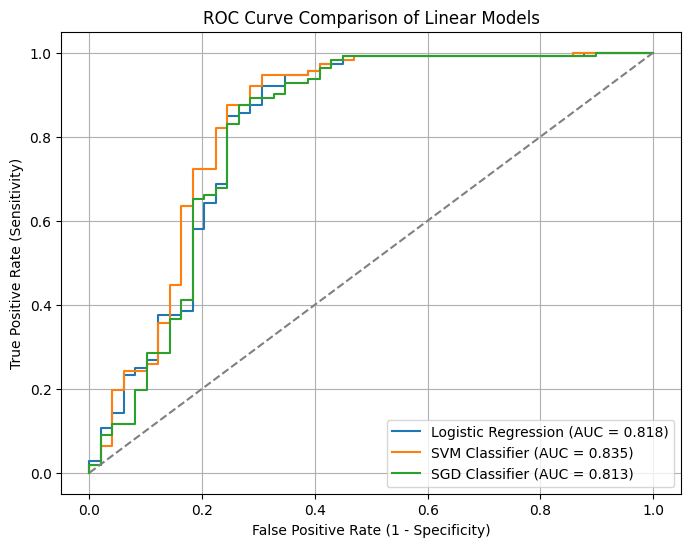

AUC Scores for Linear Models on Test Set:
Logistic Regression AUC: 0.818
SVM Classifier AUC: 0.835
SGD Classifier AUC: 0.813


In [18]:
# ============================================================
# Q4) Plotting ROC and AUC Curves for All Linear Models
# ============================================================

from sklearn.metrics import roc_curve, roc_auc_score

# now let us calculate predicted probabilities for each model
# note: we use the probability of the positive class ([:,1])
y_prob_lr = LogisticRegression_model.predict_proba(X_test)[:, 1]
y_prob_svc = SupportVectorClassModel.predict_proba(X_test)[:, 1]
y_prob_sgd = SDG_classifier.predict_proba(X_test)[:, 1]

# now compute the ROC curve coordinates (FPR, TPR)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
fpr_svc, tpr_svc, _ = roc_curve(y_test, y_prob_svc)
fpr_sgd, tpr_sgd, _ = roc_curve(y_test, y_prob_sgd)

# compute the AUC score for each model
auc_lr = roc_auc_score(y_test, y_prob_lr)
auc_svc = roc_auc_score(y_test, y_prob_svc)
auc_sgd = roc_auc_score(y_test, y_prob_sgd)

# now we plot all ROC curves together for easy comparison
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {auc_lr:.3f})")
plt.plot(fpr_svc, tpr_svc, label=f"SVM Classifier (AUC = {auc_svc:.3f})")
plt.plot(fpr_sgd, tpr_sgd, label=f"SGD Classifier (AUC = {auc_sgd:.3f})")

# add reference line for random guessing
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

# add labels and title
plt.title("ROC Curve Comparison of Linear Models")
plt.xlabel("False Positive Rate (1 - Specificity)")
plt.ylabel("True Positive Rate (Sensitivity)")
plt.legend()
plt.grid(True)
plt.show()

# finally, we display the AUC scores for each model
print(f"{BOLD}AUC Scores for Linear Models on Test Set:{END}")
print(f"Logistic Regression AUC: {auc_lr:.3f}")
print(f"SVM Classifier AUC: {auc_svc:.3f}")
print(f"SGD Classifier AUC: {auc_sgd:.3f}")


# Q5)

Use SHAP method to explain how each feature contributes to individual predictions in RL.

● Compare feature contributions across groups (e.g., employment types, education levels).

● Identify features driving prediction bias (ones that unfairly influence the outcome).

In [14]:
# we first create the SHAP Explainer
# secondly, We pass it to our trained model and the X_train data
explainer = shap.Explainer(LogisticRegression_model, X_train, feature_perturbation="interventional")

# next we obtain the SHAP values for the Test Set where the explainer() runs the calculations for all rows in X_test
shap_values = explainer(X_test)
# now we load the SHAP javascript for interactive plot
shap.initjs()

# Explain the very first prediction in the test set where X_test.iloc[0] is the data for that person
shap.force_plot(base_value=explainer.expected_value,shap_values=shap_values.values[0],features=X_test.iloc[0],feature_names=X_test.columns )

c:\Users\guyga\AppData\Local\Programs\Python\Python313\Lib\site-packages\shap\explainers\_linear.py:99: FutureWarning: The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, maskers.Partition or maskers.Impute).
  warnings.warn(wmsg, FutureWarning)


In [15]:
# now lets look for the 10 person 
shap.force_plot(base_value=explainer.expected_value,shap_values=shap_values.values[9],features=X_test.iloc[9],feature_names=X_test.columns)

Dependents one-hot columns used for comparison:
['Dependents_1', 'Dependents_2', 'Dependents_3+']
Average Impact of 'Log_LoanAmount' across Dependents Groups


Dependents_2      0.01193
Dependents_1     0.006409
Dependents_3+   -0.019451
dtype: object

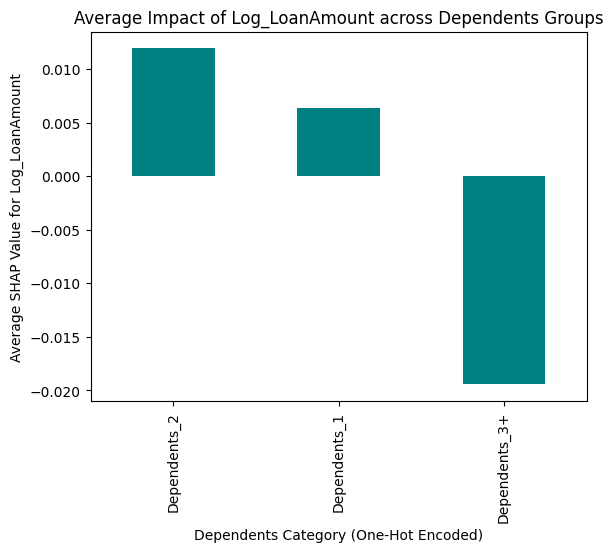

Average Feature Impact of 'Log_Total_income' by Education Level


Education
0   -0.006496
1    0.018429
Name: Log_Total_income, dtype: object


Comparing the average impact of 'Log_Total_income' for both groups:


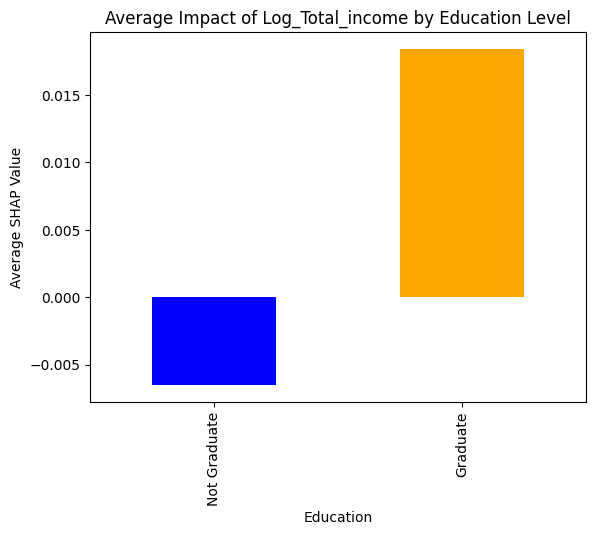

In [16]:
# now let us compare feature contributions across groups

# now let us compare feature contributions across groups
# for us we chose to compare 'Log_LoanAmount' against 'Dependents' group (after one-hot encoding)
# we first create a dataframe from the shap values for the positive class

shap_values_data_dependents = pd.DataFrame(shap_values.values, columns=X_test.columns)

# we select all columns related to Dependents after one-hot encoding
dependents_columns = [col for col in X_test.columns if 'Dependents_' in col]
print(f"{BOLD}Dependents one-hot columns used for comparison:{END}")
print(dependents_columns)

# now we calculate the average SHAP value for 'Log_LoanAmount' grouped by each dependent level
average_loan_impact_by_dependents = shap_values_data_dependents[dependents_columns].mean().sort_values(ascending=False)

print(f"{BOLD}Average Impact of 'Log_LoanAmount' across Dependents Groups{END}")
display(average_loan_impact_by_dependents)

# plotting the comparison
average_loan_impact_by_dependents.plot(kind='bar', color='teal')
plt.title("Average Impact of Log_LoanAmount across Dependents Groups")
plt.ylabel("Average SHAP Value for Log_LoanAmount")
plt.xlabel("Dependents Category (One-Hot Encoded)")
plt.show()


# now we do the same for education where we chose to compare 'Log_Total_income'

# we create a dataframe for education comparison (same approach)
shap_values_data_education = pd.DataFrame(shap_values.values, columns=X_test.columns)

# we add the 'Education' column from our test set
shap_values_data_education['Education'] = X_test['Education'].reset_index(drop=True)

# here we group by Education and calculate the average impact of Log_Total_income
# 1.0 = Graduate, 0.0 = Not Graduate
average_income_impact_by_education = shap_values_data_education.groupby('Education')['Log_Total_income'].mean()

print(f"{BOLD}Average Feature Impact of 'Log_Total_income' by Education Level{END}")
display(average_income_impact_by_education)

# visualizing the comparison using bar plot
print("\nComparing the average impact of 'Log_Total_income' for both groups:")
average_income_impact_by_education.plot(kind='bar', color=['blue', 'orange'])
plt.title("Average Impact of Log_Total_income by Education Level")
plt.ylabel("Average SHAP Value")
plt.xticks(ticks=[0, 1], labels=['Not Graduate', 'Graduate'])
plt.show()



  0%|          | 0/20 [00:00<?, ?it/s]

SHAP values successfully computed using KernelExplainer
Shape of SHAP values: (20, 24)
Shape of X_sample: (20, 24)
Feature Impact Distribution


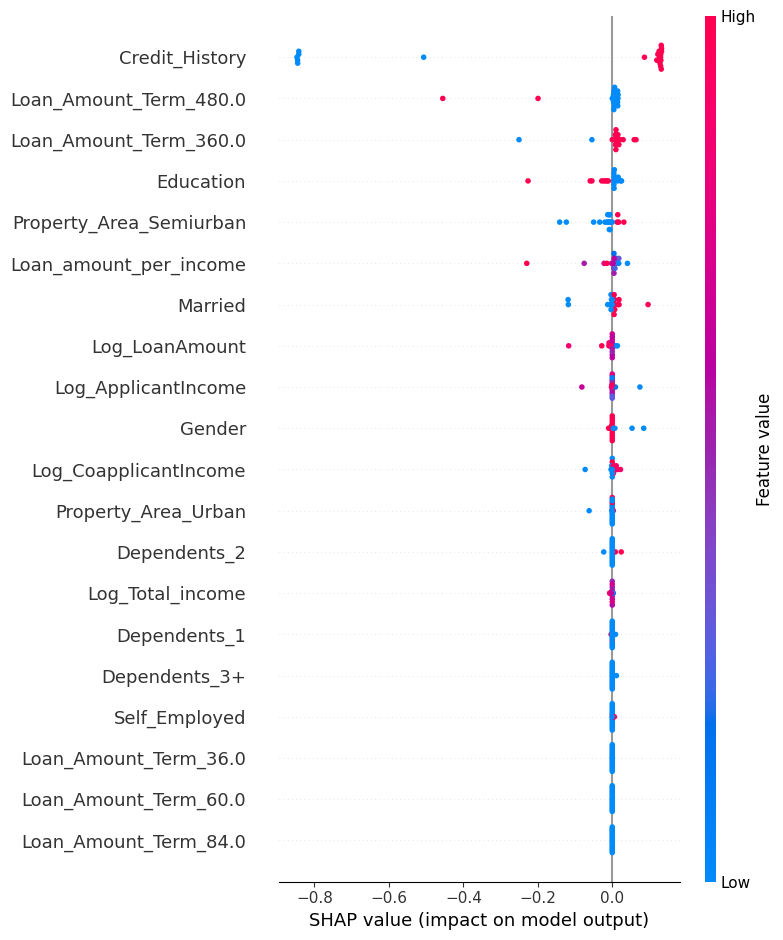

Feature Importance Ranking


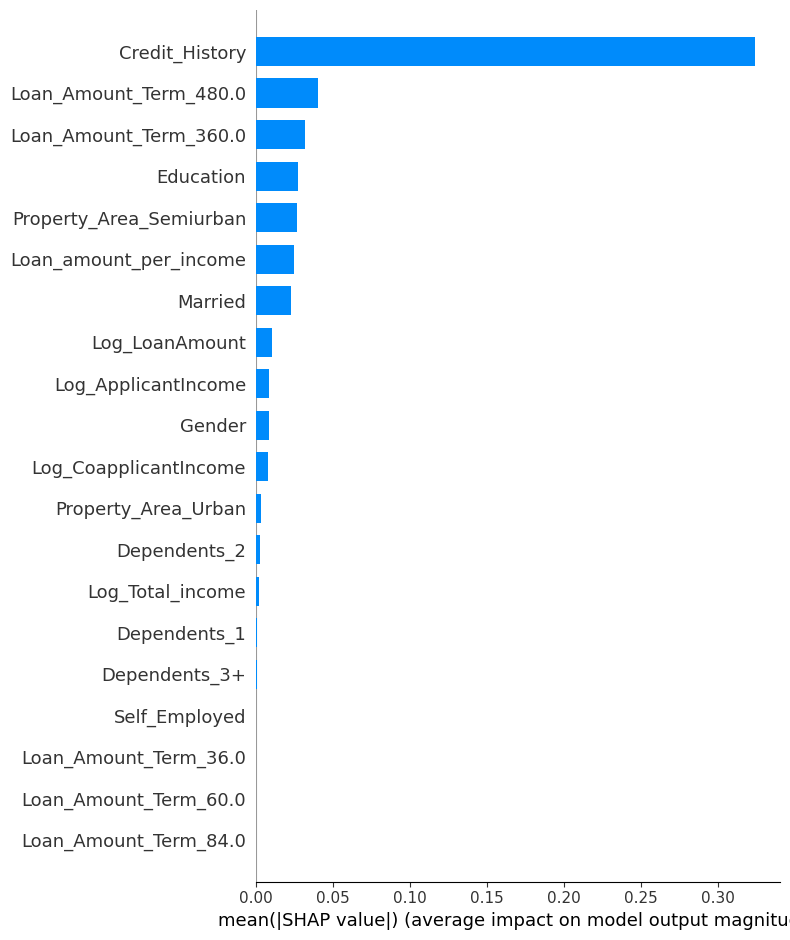

In [17]:

# we first initialize SHAP visualization
shap.initjs()

# For KernelExplainer, we need a small background sample from training data
# we take a random subset for faster computation
X_background = X_train.sample(n=80, random_state=42)

# we use the SHAP KernelExplainer for our logistic regression model
explainer = shap.KernelExplainer(LogisticRegression_model.predict, X_background)

# calculate SHAP values for a small subset of test data since KernelExplainer is slow
X_sample = X_test.sample(n=20, random_state=42)  
shap_values = explainer.shap_values(X_sample)

# Convert to numpy array
shap_values = np.array(shap_values)

print(f"{BOLD}SHAP values successfully computed using KernelExplainer{END}")
print(f"{BOLD}Shape of SHAP values:{END}", shap_values.shape)
print(f"{BOLD}Shape of X_sample:{END}", X_sample.shape)

# Global feature importance visualization
print(f"{BOLD}Feature Impact Distribution{END}")
shap.summary_plot(shap_values, features=X_sample, feature_names=X_sample.columns)
print(f"{BOLD}Feature Importance Ranking{END}")
shap.summary_plot(shap_values, features=X_sample, feature_names=X_sample.columns, plot_type="bar")
